In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

SIZE = 35

In [53]:
# 전체 데이터 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14  #도미1 빙어0


In [54]:
# 훈련용 데이터와 테스트 데이터 준비
train_input = fish_data[:SIZE]
train_target = fish_target[:SIZE]
test_input = fish_data[SIZE:]
test_target = fish_target[SIZE:]

# 도미 데이터로 훈련시킨 뒤 빙어 데이터로 테스트하면 성공률 0%
# 샘플링 편향sampling bias 문제가 발생.
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
score = kn.score(test_input, test_target)
print("score: ", score)

score:  0.0


train_input.shape:  (35, 2)
test_input.shape:  (14, 2)


ValueError: Unrecognized marker style 'b'

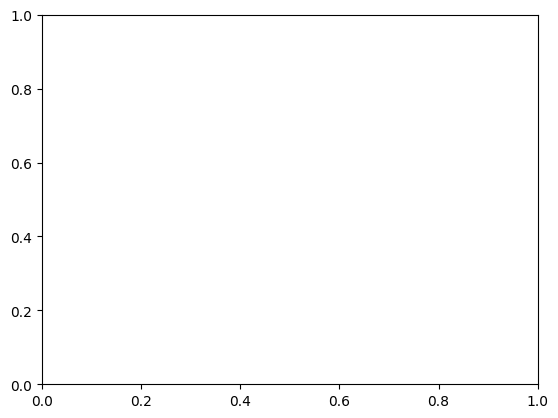

In [59]:
# 샘플린 편향문제를 해결하기 위하여 잘 섞인 데이터를 준비한다.
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# 0~48로 구성된 numpy 배열을 만들고 섞어 index가 될 배열을 준비한다.
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:SIZE]]
train_target = target_arr[index[:SIZE]]
test_input = input_arr[index[SIZE:]]
test_target = target_arr[index[SIZE:]]
print("train_input.shape: ", train_input.shape)
print("test_input.shape: ", test_input.shape)

plt.scatter(train_input[:,0], train_input[:,1], marker="x", c="b")
plt.scatter(test_input[:,0], test_input[:,1], marker="o", c="r")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
kn = KNeighborsClassifier()
print("train_input.shape: ", train_input.shape)
print("train_target.shape: ", train_target.shape)
print("test_input.shape: ", test_input.shape)
print("test_target.shape: ", test_target.shape)
kn.fit(train_input, train_target)
score = kn.score(test_input, test_target)
print("score: ", score)

train_input.shape:  (35, 2)
train_target.shape:  (35,)
test_input.shape:  (14, 2)
test_target.shape:  (14,)
score:  1.0
